<a href="https://colab.research.google.com/github/daniilomendes/Series_Temporais/blob/main/SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Séries temporais

In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
#base de dados
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/28.Prática em Python/dados/AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#visualizando os tipos de dados dos atributos
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [ ]:
#conversão dos atributos que estão no formato string para formato de data: ANO-MÊS
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/28.Prática em Python/dados/AirPassengers.csv', parse_dates = ['Month'], 
                   index_col = 'Month', date_parser = dateparse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
#visualizando o indice do dataframe
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
#criação da serie temporal
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [ ]:
#visualização do registro especifico
ts[1]

118

In [ ]:
#visualizando por ano e mês
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [ ]:
#visualizando por data especifica
ts[datetime(1949,2,1)]

118

In [ ]:
#visualizando por intervalos
ts['1950-01-01': '1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [ ]:
#visualizando de intervalos sem preencher a data de incio
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [ ]:
#visualizando por ano
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [ ]:
#valores maximos
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [ ]:
#minimo
ts.index.min()

Timestamp('1949-01-01 00:00:00')

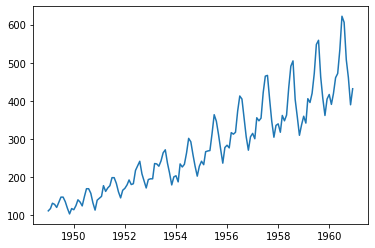

In [ ]:
#visualizando a serie temporal completa
plt.plot(ts)

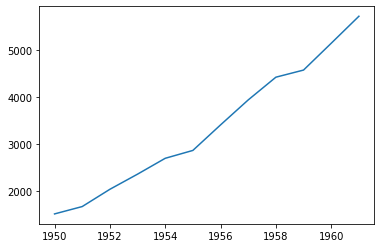

In [ ]:
#visualizando por ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

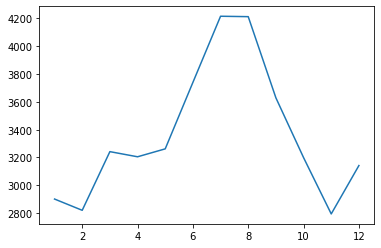

In [ ]:
#por mes
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

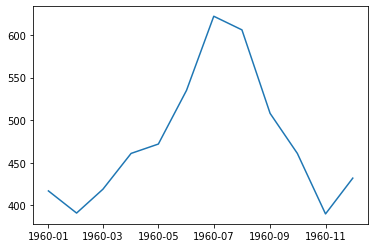

In [ ]:
#visualizando entre datas
ts_datas = ts['1960-01-01': '1960-12-01']
plt.plot(ts_datas)

Decomposição

In [ ]:
#importando bibliotecas
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#carregando base de dados, convertendo os atributos e criando a serie temporal
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/28.Prática em Python/dados/AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/28.Prática em Python/dados/AirPassengers.csv', parse_dates = ['Month'], 
                   index_col = 'Month', date_parser = dateparse)
ts = base['#Passengers']

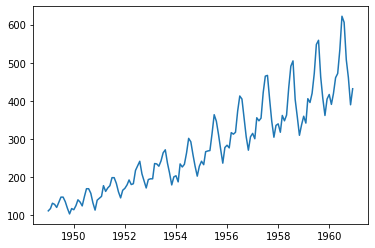

In [ ]:
#visualização da serie temporal
plt.plot(ts)

In [ ]:
#decomposição da serie temporal, criando uma variavel para cada formato
decomposicao = seasonal_decompose(ts)

In [ ]:
#tendencia
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: #Passengers, Length: 144, dtype: float64

In [ ]:
#sazonalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: #Passengers, Length: 144, dtype: float64

In [ ]:
#erro
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: #Passengers, Length: 144, dtype: float64

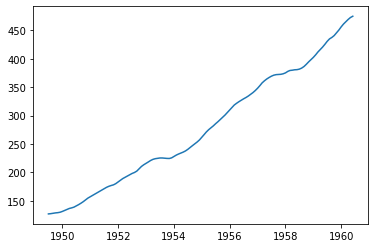

In [ ]:
#visualizando grafico para cada serie
plt.plot(tendencia)

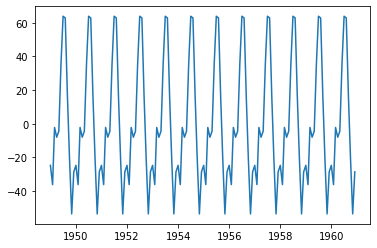

In [ ]:
plt.plot(sazonal)

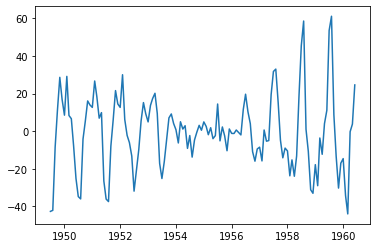

In [ ]:
plt.plot(aleatorio)

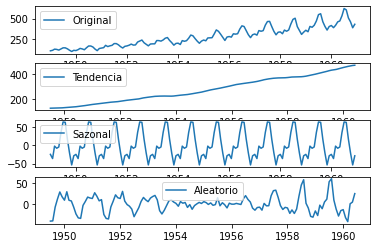

In [ ]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

#visualização somente da tendencia
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendencia')
plt.legend(loc = 'best')

#visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonal')
plt.legend(loc = 'best')

#visualização somente da aleatoridade
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aleatorio')
plt.legend(loc = 'best')

Previsões com Arima

In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA

#from pmdarima import auto_arima

from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
#carregando base de dados, convertendo os atributos e criando a serie temporal
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/28.Prática em Python/dados/AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/28.Prática em Python/dados/AirPassengers.csv', parse_dates = ['Month'], 
                   index_col = 'Month', date_parser = dateparse)
ts = base['#Passengers']

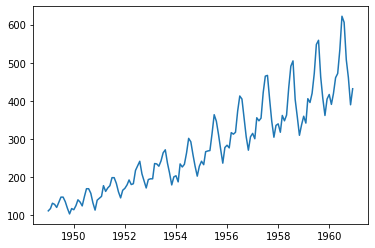

In [ ]:
#visualizando serie temporal completa
plt.plot(ts)

In [ ]:
#criação do modelo ARIMA com os parametros p = 2, q = 1, d = 2, treinamento e visualizando dados
modelo = ARIMA(ts, order = (2, 1, 2), freq = ts.index.inferred_freq)
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.716
Date:                Tue, 14 Sep 2021   AIC                           1344.043
Time:                        00:24:11   BIC                           1361.821
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.932      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9096      0.065    -29.501      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9995      0.068     14.807      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0002           -0.0479
MA.2            0.9553           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [ ]:
#previsões de 12 datas no futuro
previsoes = modelo_treinado.forecast(steps = 12)[0]
previsoes

array([433.13597744, 450.92248981, 479.85890383, 512.02530442,
       539.37415614, 555.84772127, 558.78294268, 549.30072576,
       531.66977305, 511.9043533 , 496.03234659, 488.51665349])

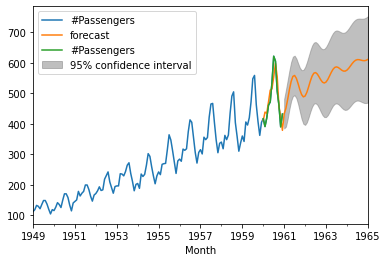

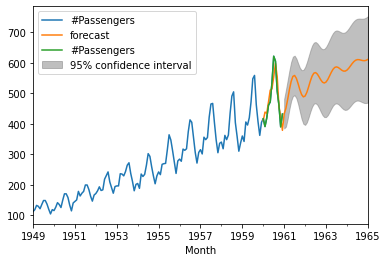

In [ ]:
#criação do eixo para a serie temporal completa, com a adição das previsoes do modelo
#plot_insample = true dados originais
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1965-01-01', ax = eixo, plot_insample = True)